In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate dates from January 2017 to December 2021 (5 years)
start_date = np.datetime64('2016-01')
end_date = np.datetime64('2026-01')  # Exclusive, so stops at Dec 2021

# Create an array with a monthly step
t = np.arange(start_date, end_date, dtype='datetime64[M]')


In [3]:
# Convert dates to a numerical format (years)
years = t.astype('datetime64[Y]').astype(int) + (t - t.astype('datetime64[Y]')) / np.timedelta64(1, 'Y')

# Generate sine wave with a period of 1 year
y = np.sin(2 * np.pi * years) + 3
y_ = y + np.random.randn(*y.shape)/5

In [4]:

start_year = 2017
end_year = 2025

ts = [t[(t >= np.datetime64(f'{year}-01')) & (t <= np.datetime64(f'{year+1}-01'))] for year in range(start_year, end_year)]
ys = [y_[(t >= np.datetime64(f'{year}-01')) & (t <= np.datetime64(f'{year+1}-01'))] for year in range(start_year, end_year)]


(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)


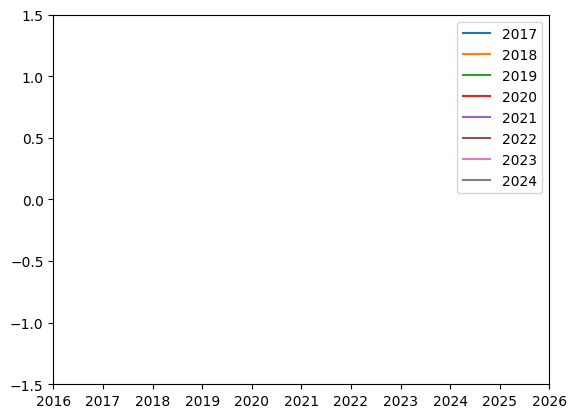

In [5]:
for year, ti, yi in zip(range(start_year, end_year), ts, ys):
    print(ti.shape)
    plt.plot(ti, yi, label=year)

plt.xlim(start_date, end_date)
plt.ylim(-1.5, 1.5)
plt.legend()

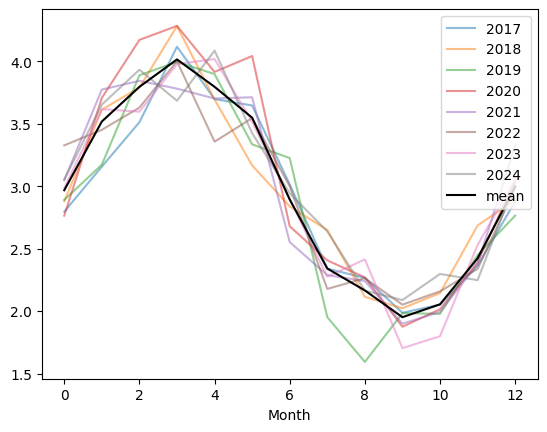

In [6]:
for year, ti, yi in zip(range(start_year, end_year), ts, ys):
    plt.plot(ti-ti[0], yi, label=year, alpha=0.5)

mu = np.array(ys).mean(axis=0)
plt.plot(ti-ti[0], mu, label="mean", alpha=1., c="k")

plt.xlabel("Month")
plt.legend()

In [7]:
ys_corrected = np.array([yi / mu for yi in ys])


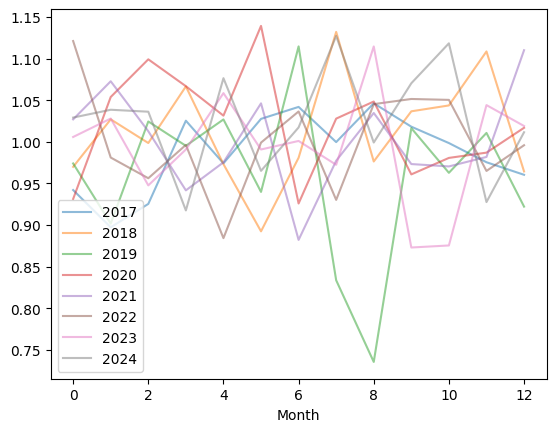

In [9]:
for year, ti, yi in zip(range(start_year, end_year), ts, ys_corrected):
    plt.plot(ti-ti[0], yi, label=year, alpha=0.5)

# plt.plot(ti-ti[0], mu, label="mean", alpha=1., c="k")

plt.xlabel("Month")
plt.legend()